<a href="https://colab.research.google.com/github/varun-varada/Movie-Recommendation-System/blob/main/Movie_Recommandation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
movies=pd.read_csv('movies.csv')
ratings=pd.read_csv('ratings.csv')


In [ ]:
print(movies.info(),"   \t  ",ratings.info())
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None    	   None



In [ ]:
# movies.head(5)
# ratting.head(5)

In [ ]:
movies.isnull().sum()
ratings.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0


In [ ]:
movies.duplicated().sum()
ratings.duplicated().sum()

0

In [ ]:
movies.rename(columns={'MovieID': 'movieId', 'Title': 'title'}, inplace=True)
print(movies.columns)


Index(['movieId', 'title', 'genres'], dtype='object')


In [ ]:
df=pd.merge(movies,ratings,on="movieId",how="inner")
df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


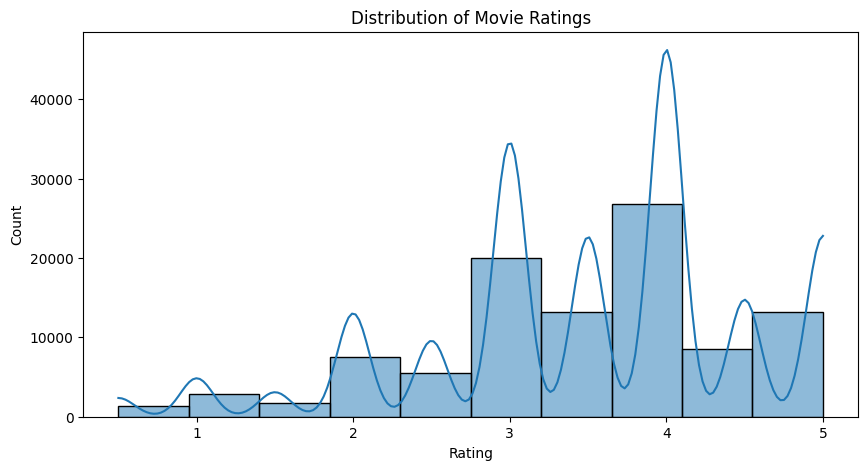

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
rating_count = df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)
print("\nTop 10 Movies by Number of Ratings:")
print(rating_count)


Top 10 Movies by Number of Ratings:
title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64


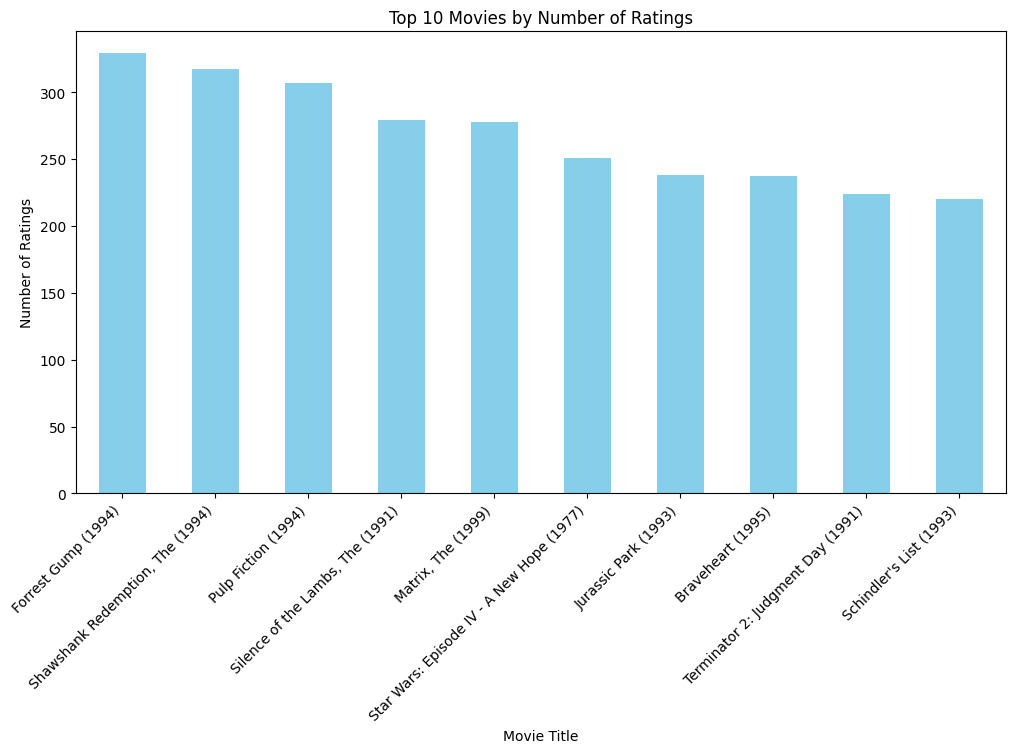

In [ ]:
plt.figure(figsize=(12, 6))
rating_count.plot(kind='bar', color='skyblue')
plt.title('Top 10 Movies by Number of Ratings')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
average_rating = df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Movies by Average Rating (at least 50 ratings):")
popular_movies = df.groupby('title').filter(lambda x: len(x) >= 50)
top_avg_rated = popular_movies.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
print(top_avg_rated)


Top 10 Movies by Average Rating (at least 50 ratings):
title
Shawshank Redemption, The (1994)                                               4.429022
Godfather, The (1972)                                                          4.289062
Fight Club (1999)                                                              4.272936
Cool Hand Luke (1967)                                                          4.271930
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)    4.268041
Rear Window (1954)                                                             4.261905
Godfather: Part II, The (1974)                                                 4.259690
Departed, The (2006)                                                           4.252336
Goodfellas (1990)                                                              4.250000
Casablanca (1942)                                                              4.240000
Name: rating, dtype: float64


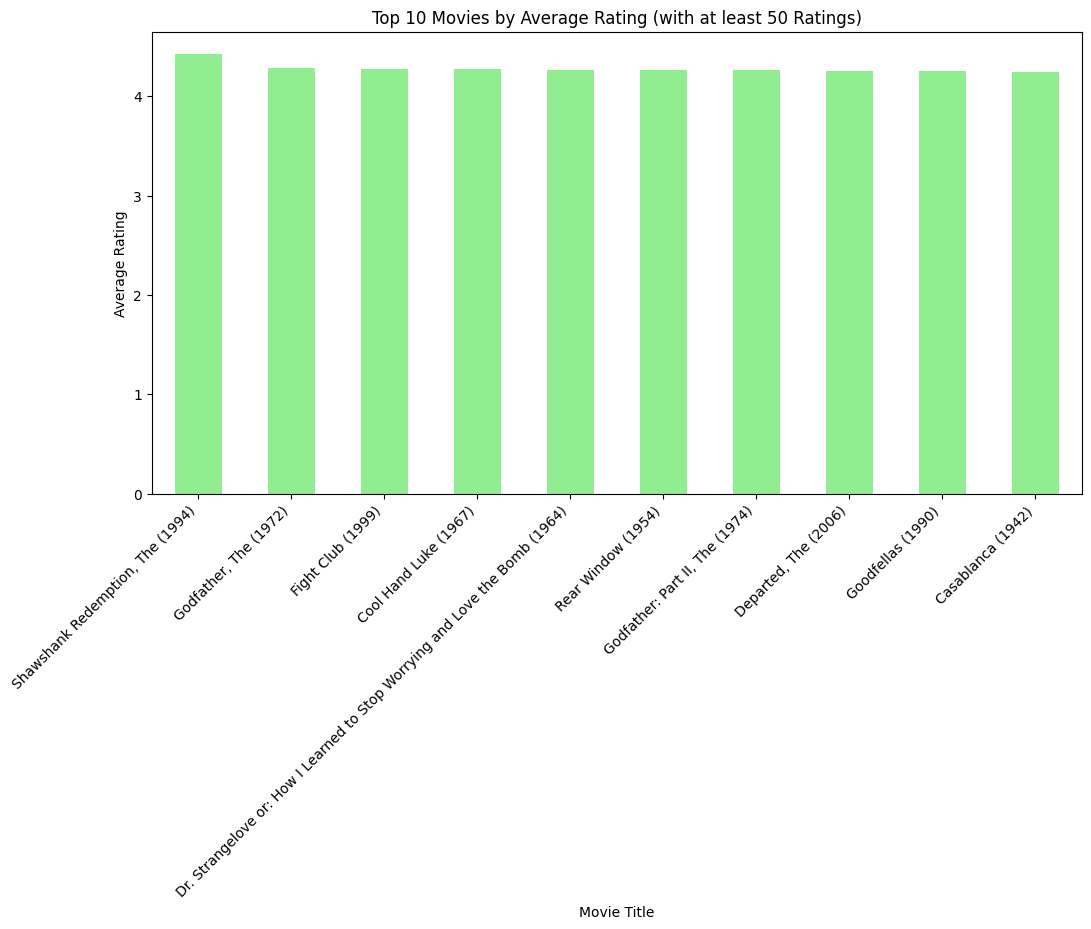

In [ ]:
plt.figure(figsize=(12, 6))
top_avg_rated.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Movies by Average Rating (with at least 50 Ratings)')
plt.xlabel('Movie Title')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
print("\nSummary:")
print("- Total Movies:", movies['movieId'].nunique())
print("- Total Ratings:", ratings.shape[0])
print("- Average Rating across all movies:", ratings['rating'].mean())
print("- Most Rated Movies are generally popular blockbusters.")
print("- Distribution of ratings shows majority of movies receive 3-4 star ratings.")


Summary:
- Total Movies: 9742
- Total Ratings: 100836
- Average Rating across all movies: 3.501556983616962
- Most Rated Movies are generally popular blockbusters.
- Distribution of ratings shows majority of movies receive 3-4 star ratings.


Popularity-Based Recommendation System

In [ ]:
top_movies=df['title'].value_counts().head(10)
print(f"Top 10 Most Rated Movies :\n{top_movies} \n")
popular_movies =df.groupby('title').filter(lambda x: len(x)>=50)
top_avg_rated = popular_movies.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)
print(f"Top 10  Movies with highest Average Rating( at least 50 ratings):{top_avg_rated}")

Top 10 Most Rated Movies :
title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: count, dtype: int64 

Top 10  Movies with highest Average Rating( at least 50 ratings):title
Shawshank Redemption, The (1994)                                               4.429022
Godfather, The (1972)                                                          4.289062
Fight Club (1999)                                                              4.272936
Cool Hand Luke (1967)                                                          4.271930
Dr. Strangelove or: How I 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 4.6+ MB


In [ ]:
df['title'].head(5)

,title
2174,Seven (a.k.a. Se7en) (1995)
24950,"Princess Bride, The (1987)"
28565,Arsenic and Old Lace (1944)
673,GoldenEye (1995)
25783,Apocalypse Now (1979)


Content based filtering

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df = df[['title', 'genres']].dropna()
df = df.sample(2000, random_state=42)

df['genres'] = df['genres'].apply(lambda x: x.lower().replace(" ", ""))

cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(df['genres'])

cosine_sim = cosine_similarity(cv_matrix, cv_matrix)

def recommend_movies(movie_title, df, cosine_sim):
    idx = df[df['title'] == movie_title].index

    if len(idx) == 0:
        return "Movie not found!"

    idx = idx[0]
    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]

    movie_indices = [i[0] for i in sim_scores]

    return df['title'].iloc[movie_indices]

print(recommend_movies("GoldenEye (1995)", df, cosine_sim))


95323                              Django Unchained (2012)
95297                              Django Unchained (2012)
95294                              Django Unchained (2012)
95289                              Django Unchained (2012)
95260                              Django Unchained (2012)
56293    For a Few Dollars More (Per qualche dollaro in...
56281    For a Few Dollars More (Per qualche dollaro in...
29762            Butch Cassidy and the Sundance Kid (1969)
49765    Fistful of Dollars, A (Per un pugno di dollari...
75643                                     Gladiator (1992)
Name: title, dtype: object


In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 10.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505186 sha256=34001f0d0d5e7956dc7762e6b271b266b69f18495f07c9a75a8d2064b71aafff
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
# if 'movieId' not in movies.columns or 'title' not in movies.columns:
#     raise KeyError("Ensure 'movies.csv' has 'movieId' and 'title' columns!")

if 'movieId' not in df.columns or 'title' not in df.columns:
    print(f"Columns found: {movies.columns}")
    raise KeyError("Ensure 'movies.csv' has 'movieId' and 'title' columns!")
# df.info()

Collaborative Filtering


In [ ]:
import pandas as pd
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy


reader = Reader(rating_scale=(ratings["rating"].min(), ratings["rating"].max()))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

model = SVD()
model.fit(trainset)

predictions = model.test(testset)

accuracy.rmse(predictions)

def recommend_movies_for_user(user_id, df, model, num_recommendations=10):
    movie_ids = df['movieId'].unique()
    predictions = [model.predict(user_id, movie_id) for movie_id in movie_ids]
    predictions.sort(key=lambda x: x.est, reverse=True)

    recommended_movies = [df[df['movieId'] == pred.iid]['title'].values[0] for pred in predictions[:num_recommendations]]
    return recommended_movies

print(recommend_movies_for_user(1, df, model, 10))


RMSE: 0.8791
['Usual Suspects, The (1995)', 'Star Wars: Episode IV - A New Hope (1977)', 'Shawshank Redemption, The (1994)', "Schindler's List (1993)", 'Godfather, The (1972)', 'Casablanca (1942)', 'Cinema Paradiso (Nuovo cinema Paradiso) (1989)', 'Princess Bride, The (1987)', 'Grand Day Out with Wallace and Gromit, A (1989)', 'Seventh Seal, The (Sjunde inseglet, Det) (1957)']


In [ ]:
from surprise import Trainset

trainset = data.build_full_trainset()
model.fit(trainset)

def recommend_movies(user_id, model, movies, trainset, n=10):
    movie_ids = list(set(trainset.all_items()) - set(trainset.ur[trainset.to_inner_uid(user_id)]))
    predictions = [model.predict(user_id, trainset.to_raw_iid(mid)) for mid in movie_ids]
    predictions.sort(key=lambda x: x.est, reverse=True)
    top_movies = [movies[movies["movieId"] == pred.iid]["title"].values[0] for pred in predictions[:n]]
    return top_movies

user_id = 1
print(recommend_movies(user_id, model, movies, trainset))


['Monty Python and the Holy Grail (1975)', 'Full Metal Jacket (1987)', 'Fantasia (1940)', 'Green Mile, The (1999)', 'Shawshank Redemption, The (1994)', 'Departed, The (2006)', 'Whiplash (2014)', 'Philadelphia Story, The (1940)', 'Rear Window (1954)', 'North by Northwest (1959)']


Hybrid Model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

movies = movies.dropna(subset=['genres'])
vectorizer = CountVectorizer(stop_words='english')
genre_matrix = vectorizer.fit_transform(movies['genres'])

cosine_sim = cosine_similarity(genre_matrix, genre_matrix)

def content_recommend(movie_title, movies, cosine_sim):
    idx = movies[movies['title'] == movie_title].index
    if len(idx) == 0:
        return "Movie not found!"

    idx = idx[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]
    movie_indices = [i[0] for i in sim_scores]

    return movies['title'].iloc[movie_indices]

print(content_recommend("GoldenEye (1995)", movies, cosine_sim))

from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2)
model = SVD()
model.fit(trainset)

predictions = model.test(testset)
print("RMSE:", accuracy.rmse(predictions))

def predict_rating(userId, movieId, model):
    return model.predict(userId, movieId).est



def hybrid_recommend(movie_title, userId, movies, cosine_sim, model):
    content_movies = content_recommend(movie_title, movies, cosine_sim)
    ranked_movies = []

    for movie in content_movies:
        movieId = movies[movies['title'] == movie]['movieId'].values[0]
        predicted_rating = predict_rating(userId, movieId, model)
        ranked_movies.append((movie, predicted_rating))

    ranked_movies = sorted(ranked_movies, key=lambda x: x[1], reverse=True)

    return [movie[0] for movie in ranked_movies[:5]]

print(hybrid_recommend("GoldenEye (1995)", 1, movies, cosine_sim, model))


84            Broken Arrow (1996)
378            Cliffhanger (1993)
431     Executive Decision (1996)
479     Surviving the Game (1994)
592              Rock, The (1996)
648         Chain Reaction (1996)
754           Maximum Risk (1996)
1053            Die Hard 2 (1990)
1145              Anaconda (1997)
1171               Con Air (1997)
Name: title, dtype: object
RMSE: 0.8748
RMSE: 0.8747787180272081
['Rock, The (1996)', 'Executive Decision (1996)', 'Surviving the Game (1994)', 'Die Hard 2 (1990)', 'Maximum Risk (1996)']
